#### Writing data to the file.

In [114]:
import requests
import json
import csv
import time

api_key = 'Kv2FxshEyzdodl0Hh00O0OaHd0wASYm6'
base_url = 'https://api.nytimes.com/svc/archive/v1/'

start = ""
end = ""

keywords = ['anarchist', 'anarchists', 'anarchism']
collection = [] 

url_template = f'{base_url}%d/%d.json?api-key={api_key}'

print("Program is running...")

for year in range(start, end + 1):
    for month in range(1, 13):  # Fetch for all 12 months
        full_url = url_template % (year, month)
        print(full_url)
            
        response = requests.get(full_url)
        
        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the JSON response
            data = response.json()
          
            for article in data['response']['docs']:
                headline = article['headline']['main'].lower()
                
                found = any(word in headline for word in keywords)
                if found:
                    collection.append(article)
                    
            time.sleep(13)  # Sleep for 13 seconds to avoid rate limits
        
        else:
            print(f"Error: {response.status_code}, {response.text}")

# Write data to CSV file
csv_file_path = 'nyt_headlines.csv'
fieldnames = ['publish_date', 'headline']

with open(csv_file_path, 'a', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    # Write header only if the file is empty
    if csvfile.tell() == 0:
        writer.writeheader()
    
    for article in collection:
        publish_date = article['pub_date']
        headline = article['headline']['main']
        writer.writerow({'publish_date': publish_date, 'headline': headline})

print("Program is done. Data written to nyt_headlines.csv.")


Program is running...


TypeError: can only concatenate str (not "int") to str

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("nyt_headlines.csv")
data["publish_date"] = pd.to_datetime(data["publish_date"])

#Create Month and Year colunms
data["month"] = data["publish_date"].dt.month
data["year"] = data["publish_date"].dt.year

print(data.head())

frequency = data.groupby('year').size().reset_index(name='count')
total_entries = frequency['count'].sum()

               publish_date  \
0 1890-01-05 05:00:00+00:00   
1 1890-02-08 05:00:00+00:00   
2 1890-04-29 05:00:00+00:00   
3 1890-04-30 05:00:00+00:00   
4 1890-05-01 05:00:00+00:00   

                                            headline  month  year  
0  HIS THREATS CARRIED OUT.; A CRAZY ANARCHIST KI...      1  1890  
1  MAY HAVE TO HANG YET.; IMPRISONED CHICAGO ANAR...      2  1890  
2  ANARCHISTS VERY ACTIVE; EUROPE'S WORKINGMEN IN...      4  1890  
3  INCITED TO REVOLUTION; ANARCHISTS AND BOULANGI...      4  1890  
4  EUROPE IN GREAT FEAR; GREAT PREPARATIONS TO RE...      5  1890  


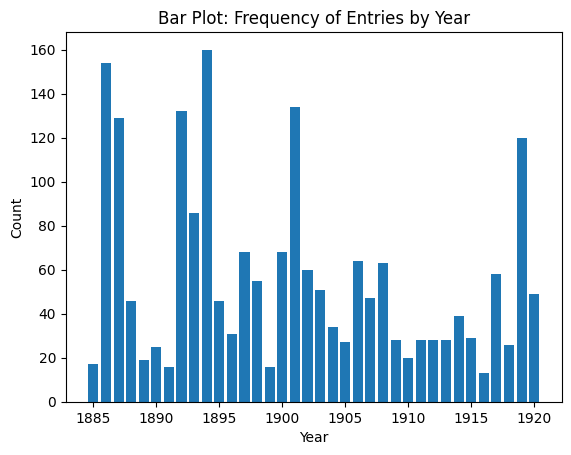

In [116]:
plt.bar(frequency['year'], frequency['count'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Bar Plot: Frequency of Entries by Year')
plt.show()

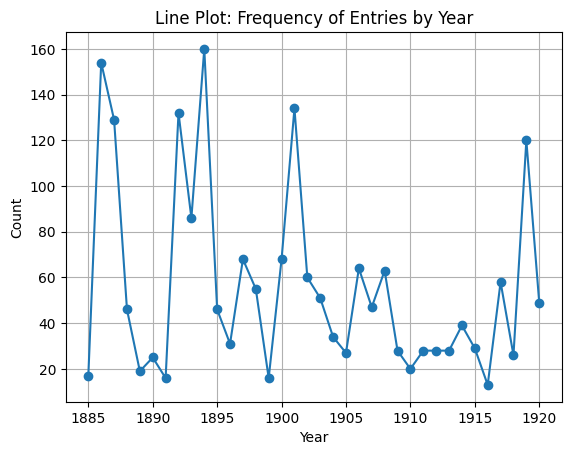

In [161]:
import matplotlib.pyplot as plt

plt.plot(frequency['year'], frequency['count'], marker='o')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Line Plot: Frequency of Entries by Year')
plt.grid(True)
plt.show()

In [162]:
data["month_year"] = data["publish_date"].dt.strftime('%Y-%m')
frequency_two = data.groupby('month_year').size().reset_index(name='count')

frequency_two.head()

,month_year,count
0,1885-01,2
1,1885-02,6
2,1885-03,3
3,1885-04,1
4,1885-05,2


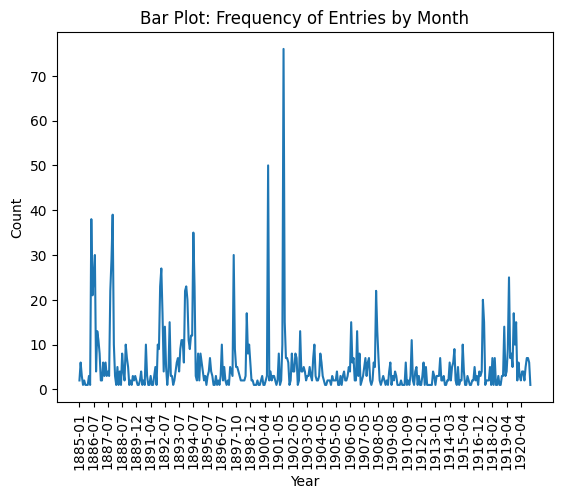

In [163]:
plt.plot(frequency_two['month_year'], frequency_two['count'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Bar Plot: Frequency of Entries by Month')

plt.xticks(frequency_two['month_year'][::12], rotation=90)

plt.show()

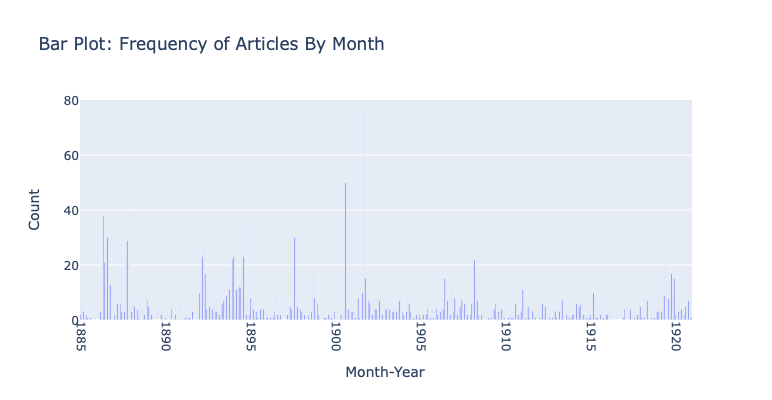

In [167]:
import plotly.express as px

fig = px.bar(frequency_two, x='month_year', y='count',
             labels={'month_year': 'Month-Year', 'count': 'Count'},
             title='Bar Plot: Frequency of Articles By Month',
             hover_data={'month_year': '|%B %Y'},
             width=800, height=400)

fig.update_xaxes(tickangle=90)

fig.show()
fig.write_html("ArticlesByMonth.html")

/Users/samuelshally/opt/anaconda3/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/Users/samuelshally/opt/anaconda3/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



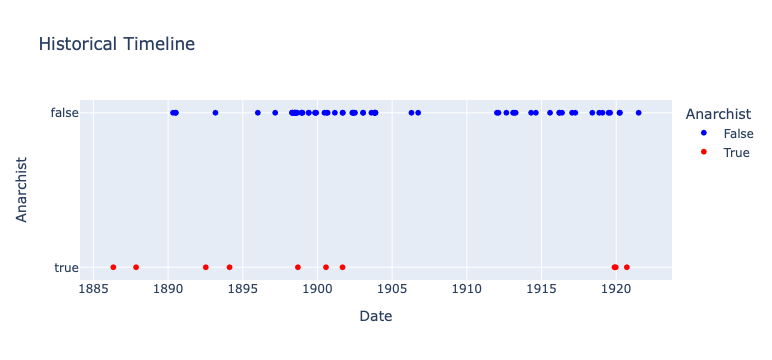

In [165]:
timeline = pd.read_csv("events.csv")
timeline = pd.read_csv("events.csv", parse_dates=["Date"], dayfirst=True)
timeline = timeline.sort_values('Date')

fig = px.scatter(timeline, x='Date', y='Anarchist', color='Anarchist',
                 title='Historical Timeline', hover_data=['Headline'],
                 labels={'Anarchist': 'Anarchist'},
                 category_orders={'Anarchist': [False, True]},
                 color_discrete_map={False: 'blue', True: 'red'})

fig.show()
fig.write_html("historical_timeline.html")

In [171]:
# Create an interactive timeline
fig = px.timeline(data, x_start="publish_date", x_end="publish_date", y="headline", color="month",
                   labels={"headline": "Headline"},
                   title="Historical Headlines Timeline",
                   hover_data={"publish_date": "|%B %d, %Y"},
                   category_orders={"month": range(1, 13)})

# Update layout for better readability
fig.update_layout(xaxis_title="Date",
                  yaxis_title="Headlines",
                  legend_title="Month",
                  showlegend=False)  # Hide legend for month



TypeError: Object of type timedelta is not JSON serializable

In [172]:
# Create an interactive timeline
fig = px.timeline(data, x_start="publish_date", x_end="publish_date", y="headline", color="month",
                   labels={"headline": "Headline"},
                   title="Historical Headlines Timeline",
                   hover_data={"publish_date": "|%B %d, %Y"},
                   category_orders={"month": range(1, 13)})

# Update layout for better readability
fig.update_layout(xaxis_title="Date",
                  yaxis_title="Headlines",
                  legend_title="Month",
                  showlegend=False)  # Hide legend for month

# Show the interactive plot in Python
fig.show()



TypeError: Object of type timedelta is not JSON serializable